In [2]:
!unzip '/content/drive/MyDrive/testt.zip' -d '/content/drive/MyDrive/testt.unzip'

Archive:  /content/drive/MyDrive/testt.zip
replace /content/drive/MyDrive/testt.unzip/gender/Training/female/131531.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(os.listdir(r'/content/drive/MyDrive/testt.unzip/gender/Training'))

['male', 'female']


In [5]:
folder_paths = [
    r"/content/drive/MyDrive/testt.unzip/gender/Training/female",
    r"/content/drive/MyDrive/testt.unzip/gender/Training/male",
]


In [6]:
dataset = []
for i in folder_paths:
    folder_name = os.path.basename(i)

    for file_name in os.listdir(i):
        image_path=os.path.join(i, file_name)

        if os.path.isfile(image_path): # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (250, 250))

                # Flatten the image and append each pixel as a separate feature al
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

In [7]:
df = pd.DataFrame(dataset)
df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,62500
0,33,33,28,23,19,17,14,12,11,11,...,142,157,154,141,129,143,163,184,185,female
1,88,88,90,92,94,91,87,84,80,76,...,93,94,91,88,85,83,81,79,79,female
2,82,82,82,81,81,76,69,63,64,70,...,78,70,66,61,58,65,72,79,79,female
3,59,59,61,63,66,69,72,75,77,80,...,28,27,27,27,27,28,30,32,32,female
4,14,14,12,11,9,8,6,5,4,4,...,46,47,51,55,59,60,61,62,62,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,47,47,50,53,56,61,67,72,73,74,...,40,28,24,19,15,17,19,21,21,male
1996,68,68,69,70,71,69,68,66,65,64,...,133,133,134,134,135,135,135,135,135,male
1997,14,14,14,15,15,15,16,17,19,22,...,18,19,23,30,37,39,38,38,38,male
1998,93,93,78,62,46,62,93,123,134,123,...,35,41,50,59,61,48,35,24,24,male


In [8]:
last_label_column=df.iloc[:,-1]
last_label_column

0       female
1       female
2       female
3       female
4       female
         ...  
1995      male
1996      male
1997      male
1998      male
1999      male
Name: 62500, Length: 2000, dtype: object

In [9]:
# Count the occurrences of each unique label

label_counts=last_label_column.value_counts()
label_counts

female    1000
male      1000
Name: 62500, dtype: int64

In [10]:
X=df.iloc[:,:62500]
X=X/255
X

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,0.129412,0.129412,0.109804,0.090196,0.074510,0.066667,0.054902,0.047059,0.043137,0.043137,...,0.494118,0.556863,0.615686,0.603922,0.552941,0.505882,0.560784,0.639216,0.721569,0.725490
1,0.345098,0.345098,0.352941,0.360784,0.368627,0.356863,0.341176,0.329412,0.313725,0.298039,...,0.364706,0.364706,0.368627,0.356863,0.345098,0.333333,0.325490,0.317647,0.309804,0.309804
2,0.321569,0.321569,0.321569,0.317647,0.317647,0.298039,0.270588,0.247059,0.250980,0.274510,...,0.337255,0.305882,0.274510,0.258824,0.239216,0.227451,0.254902,0.282353,0.309804,0.309804
3,0.231373,0.231373,0.239216,0.247059,0.258824,0.270588,0.282353,0.294118,0.301961,0.313725,...,0.113725,0.109804,0.105882,0.105882,0.105882,0.105882,0.109804,0.117647,0.125490,0.125490
4,0.054902,0.054902,0.047059,0.043137,0.035294,0.031373,0.023529,0.019608,0.015686,0.015686,...,0.180392,0.180392,0.184314,0.200000,0.215686,0.231373,0.235294,0.239216,0.243137,0.243137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.184314,0.184314,0.196078,0.207843,0.219608,0.239216,0.262745,0.282353,0.286275,0.290196,...,0.200000,0.156863,0.109804,0.094118,0.074510,0.058824,0.066667,0.074510,0.082353,0.082353
1996,0.266667,0.266667,0.270588,0.274510,0.278431,0.270588,0.266667,0.258824,0.254902,0.250980,...,0.525490,0.521569,0.521569,0.525490,0.525490,0.529412,0.529412,0.529412,0.529412,0.529412
1997,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.062745,0.066667,0.074510,0.086275,...,0.062745,0.070588,0.074510,0.090196,0.117647,0.145098,0.152941,0.149020,0.149020,0.149020
1998,0.364706,0.364706,0.305882,0.243137,0.180392,0.243137,0.364706,0.482353,0.525490,0.482353,...,0.121569,0.137255,0.160784,0.196078,0.231373,0.239216,0.188235,0.137255,0.094118,0.094118


In [11]:
Y=df.iloc[:,-1]
Y

0       female
1       female
2       female
3       female
4       female
         ...  
1995      male
1996      male
1997      male
1998      male
1999      male
Name: 62500, Length: 2000, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

d=LabelEncoder()
y_encoded=d.fit_transform(Y)
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
y_series=pd.Series(y_encoded)
y_series

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Length: 2000, dtype: int64

In [14]:
df=pd.concat([X, y_series], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,0
0,0.129412,0.129412,0.109804,0.090196,0.074510,0.066667,0.054902,0.047059,0.043137,0.043137,...,0.556863,0.615686,0.603922,0.552941,0.505882,0.560784,0.639216,0.721569,0.725490,0
1,0.345098,0.345098,0.352941,0.360784,0.368627,0.356863,0.341176,0.329412,0.313725,0.298039,...,0.364706,0.368627,0.356863,0.345098,0.333333,0.325490,0.317647,0.309804,0.309804,0
2,0.321569,0.321569,0.321569,0.317647,0.317647,0.298039,0.270588,0.247059,0.250980,0.274510,...,0.305882,0.274510,0.258824,0.239216,0.227451,0.254902,0.282353,0.309804,0.309804,0
3,0.231373,0.231373,0.239216,0.247059,0.258824,0.270588,0.282353,0.294118,0.301961,0.313725,...,0.109804,0.105882,0.105882,0.105882,0.105882,0.109804,0.117647,0.125490,0.125490,0
4,0.054902,0.054902,0.047059,0.043137,0.035294,0.031373,0.023529,0.019608,0.015686,0.015686,...,0.180392,0.184314,0.200000,0.215686,0.231373,0.235294,0.239216,0.243137,0.243137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.184314,0.184314,0.196078,0.207843,0.219608,0.239216,0.262745,0.282353,0.286275,0.290196,...,0.156863,0.109804,0.094118,0.074510,0.058824,0.066667,0.074510,0.082353,0.082353,1
1996,0.266667,0.266667,0.270588,0.274510,0.278431,0.270588,0.266667,0.258824,0.254902,0.250980,...,0.521569,0.521569,0.525490,0.525490,0.529412,0.529412,0.529412,0.529412,0.529412,1
1997,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.062745,0.066667,0.074510,0.086275,...,0.070588,0.074510,0.090196,0.117647,0.145098,0.152941,0.149020,0.149020,0.149020,1
1998,0.364706,0.364706,0.305882,0.243137,0.180392,0.243137,0.364706,0.482353,0.525490,0.482353,...,0.137255,0.160784,0.196078,0.231373,0.239216,0.188235,0.137255,0.094118,0.094118,1


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test=train_test_split(X,y_series,test_size=0.2,random_state=42)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a new model
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Additional hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
40/40 [==============================] - 3s 31ms/step - loss: 1.0844 - accuracy: 0.5336 - val_loss: 0.7231 - val_accuracy: 0.6281
Epoch 2/10
40/40 [==============================] - 1s 17ms/step - loss: 0.7846 - accuracy: 0.6109 - val_loss: 0.9759 - val_accuracy: 0.5844
Epoch 3/10
40/40 [==============================] - 1s 17ms/step - loss: 0.6225 - accuracy: 0.6711 - val_loss: 0.6876 - val_accuracy: 0.5906
Epoch 4/10
40/40 [==============================] - 1s 18ms/step - loss: 0.5688 - accuracy: 0.7102 - val_loss: 0.5731 - val_accuracy: 0.7188
Epoch 5/10
40/40 [==============================] - 1s 19ms/step - loss: 0.5610 - accuracy: 0.7094 - val_loss: 0.4993 - val_accuracy: 0.7844
Epoch 6/10
40/40 [==============================] - 1s 20ms/step - loss: 0.5384 - accuracy: 0.7297 - val_loss: 0.4704 - val_accuracy: 0.8125
Epoch 7/10
40/40 [==============================] - 1s 22ms/step - loss: 0.4903 - accuracy: 0.7508 - val_loss: 0.6467 - val_accuracy: 0.6938
Epoch 8/10
40

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

13/13 [==============================] - 0s 10ms/step - loss: 0.4646 - accuracy: 0.7800
Test accuracy: 0.7800


1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


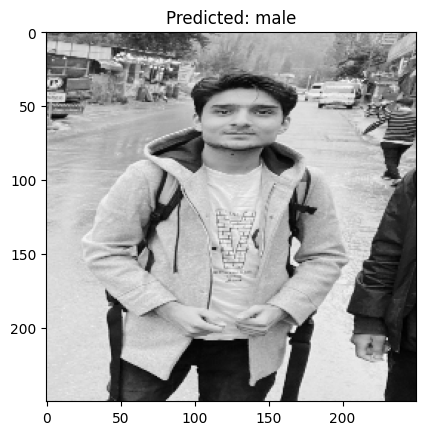

In [40]:

path = '/content/drive/MyDrive/khurram.jpeg'
img4=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img4, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


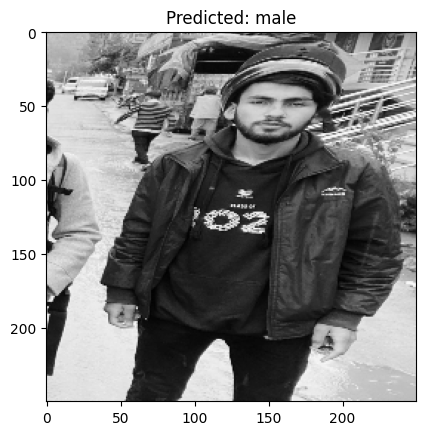

In [41]:
path = '/content/drive/MyDrive/seemab.jpeg'
img5=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img5, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 66ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


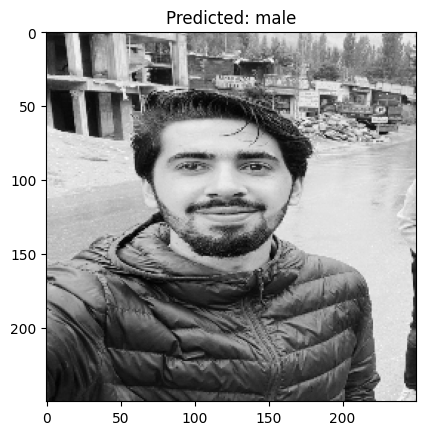

In [39]:
path = '/content/drive/MyDrive/sayan.jpeg'
img3=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img3, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 59ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


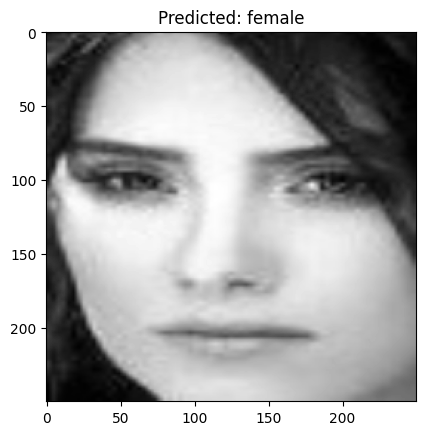

In [32]:
path = '/content/drive/MyDrive/testt.unzip/gender/Validation/female/112944.jpg.jpg'
img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


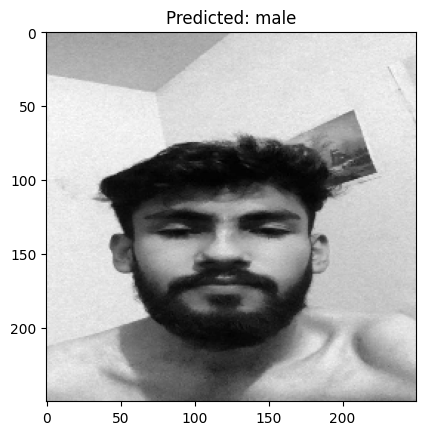

In [33]:
path = '/content/drive/MyDrive/WhatsApp Image 2023-08-21 at 11.57.07 AM.jpeg'
img1=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img1, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


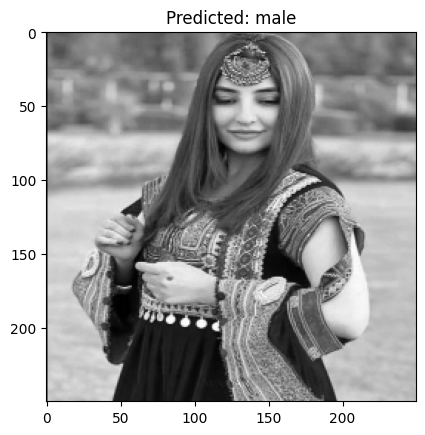

In [45]:
path = '/content/drive/MyDrive/IMG_0224.jpg'
img6=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img6, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


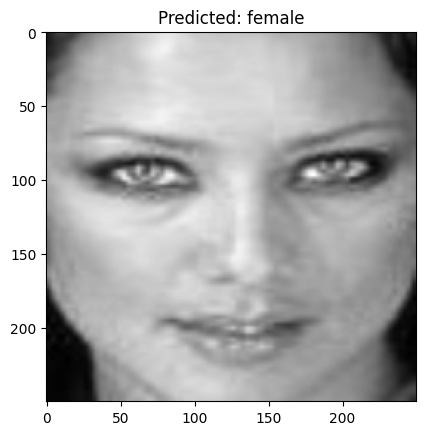

In [46]:
path = '/content/drive/MyDrive/testt.unzip/gender/Validation/female/112974.jpg.jpg'
img6=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img6, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()

1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


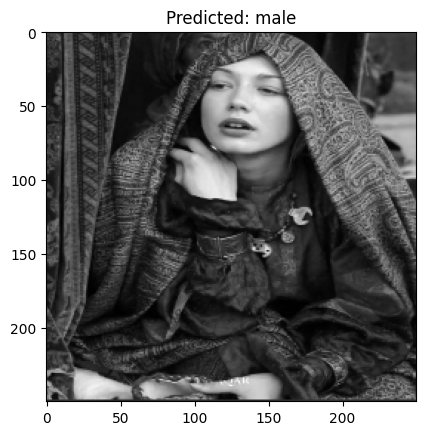

In [47]:
path = '/content/drive/MyDrive/IMG_0221.jpg'
img7=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resize=cv2.resize(img7, (250,250))
flattened = resize.flatten()
reshape = flattened.reshape(1, -1)
scaled_reshaped = reshape/255
c=model.predict(reshape)

prediction = model.predict(scaled_reshaped)
predicted_class = int(np.round(prediction))  # Convert the probability to a class (0 or 1)

# Decode the predicted class
encoded_pred = d.inverse_transform([[predicted_class]])[0]

# Display the image and prediction
plt.imshow(resize, cmap='gray')
plt.title("Predicted: " + encoded_pred)
plt.show()